File ini merupakan sintaks regresi logistik biner dengan regulasi ridge dengan data yang sudah di edit
dengan masalah masalah yang mungkin saja terjadi pada saat melakukan permodelan atau analisis

In [128]:
#import library
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [129]:
# Regresi Logistik Biner dengan Ridge Regulation

class LogisticRegression:
    def __init__(self, lr=0.01, num_iter=1000, fit_intercept=True, verbose=True, _lambda=0.01):
        """
       Inisialisasi objek LogisticRegression dengan nilai default
        """
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
        self.verbose = verbose
        self._lambda = _lambda
    
    def __add_intercept(self, X):
        """
        Metode untuk menambahkan intersep ke dalam data X
        """
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
    
    def __sigmoid(self, z):
        """
        Metode menghitung nilai logit/sigmoid
        """
        return 1 / (1 + np.exp(-z))
    
    def __loss(self, h, y):
        """
        Metode untuk menghitung fungsi loss regresi logistik dengan regularisasi ridge
        """
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean() + (self._lambda/2 * np.sum(self.theta[1:] ** 2)/y.size)
    
    def fit(self, X, y):
        """
        Metode untuk membangun model regresi logistik dengan regulasi ridge untuk memasukkan data X dan variabel target y
        """
        if self.fit_intercept:
            X = self.__add_intercept(X)
        
        # Inisialisasi theta dengan nol
        self.theta = np.zeros(X.shape[1])

        # Menetapkan X sebagai class attribute
        self.X = X

        # Menetapkan y sebagai class attribute
        self.y = y
            
        # Gradient descent
        for i in range(self.num_iter):
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            
            # Menghitung gradient dengan regulasi ridge dengan fungsi turunan pasial terhadap theta dari loss
            gradient = np.dot(X.T, (h - y)) / y.size + self._lambda * np.r_[0, self.theta[1:]/y.size]
            
            # Update theta dengan hasil perhitungan gradient descent
            self.theta -= self.lr * gradient
            
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            loss = self.__loss(h, y)
            
            # Mencetak Loss pada iterasi tertentu jika argumen verbose = TRUE
            if self.verbose and i % 100 == 0:
                print(f'Loss at iteration {i}: {loss}')
        
        # Menghitung varians, standard error, and p-value untuk melihat kebaikan model
        self.variancebeta =np.diag(np.linalg.inv(np.dot(X.T, X) + self._lambda * np.identity(X.shape[1]))) 
        self.se = np.array(np.sqrt(self.variancebeta))
        self.t = self.theta / self.se
        self.p = 2 * (1 - stats.t.cdf(np.abs(self.t), y.size - X.shape[1]))
    
    def predict_prob(self, X):
        """
        Metode unutk memprediksi probabilitas kelas 1 pada data input X
        """
        if self.fit_intercept:
            X = self.__add_intercept(X)
    
        return self.__sigmoid(np.dot(X, self.theta))
    
    def predict(self, X, threshold=0.5):
        """
        Metode untuk memprediksi label kelas dari data input X dengan ambang batas yang ditentukan (defaultnya adalah 0,5)
        """
        return self.predict_prob(X) >= threshold
    
    def summary(self):
        """
        Metode untuk mencetak ringkasan model regresi logistik
        """
        if not hasattr(self, 'theta'):
            raise ValueError("Model hasn't been trained yet.")
        
        print("Coefficient Estimates:")
        print(self.theta)

        print("\nOdds Ratio:")
        print(np.exp(self.theta))

        print("\nStandard Errors:")
        print(self.se)

        print("\nT-values:")
        print(self.t)

        print("\nP-values:")
        print(self.p)       


In [134]:
# Read Data advertising CSV
df = pd.read_csv("Ad.csv", sep=";", decimal=".")

In [136]:
# Melihat data secara sekilas
df.head()

,Daily Time Spent on Site,Daily Time Spent on Apps,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,68.95,59.46,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,Female,Tunisia,27/03/2016 00:53,1
1,80.23,63.71,31,68441.85,193.77,Monitored national standardization,West Jodi,Male,Nauru,04/04/2016 01:39,1
2,69.47,53.84,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,Female,San Marino,13/03/2016 20:35,1
3,74.15,56.04,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,Male,Italy,10/01/2016 02:31,1
4,68.37,55.64,35,73889.99,225.58,Robust logistical utilization,South Manuel,Female,Iceland,03/06/2016 03:36,1


In [137]:
# Informasi tentang tipe data dan missing value
print(df.shape)
df.info()

(850, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  850 non-null    float64
 1   Daily Time Spent on Apps  850 non-null    float64
 2   Age                       850 non-null    int64  
 3   Area Income               846 non-null    float64
 4   Daily Internet Usage      850 non-null    float64
 5   Ad Topic Line             850 non-null    object 
 6   City                      850 non-null    object 
 7   Gender                    850 non-null    object 
 8   Country                   850 non-null    object 
 9   Timestamp                 850 non-null    object 
 10  Clicked on Ad             850 non-null    int64  
dtypes: float64(4), int64(2), object(5)
memory usage: 73.2+ KB


Terlihat bahwa pada variabel Area Income terdapat 4 missing value

<Axes: xlabel='Area Income', ylabel='Count'>

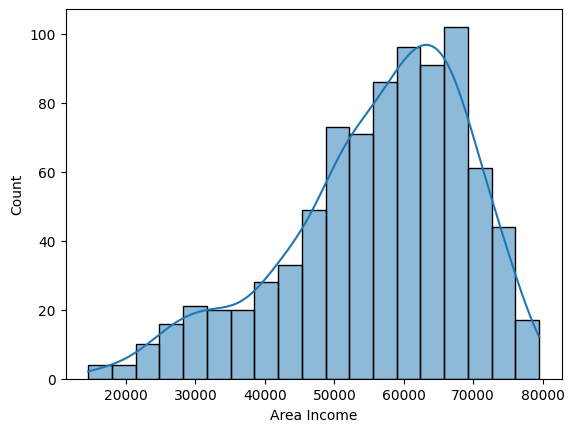

In [138]:
sns.histplot(df['Area Income'], kde=True)

Melihat distribusi Area Income sebagai acuan handling missing value dengan imputasi

In [139]:
""" Handling missing value jika terdapat missing value dengan """

# Mengisi missing value dengan mean
#df['A'].fillna(df['A'].mean(), inplace=True)

# Mengisi missing value dengan median
df['Area Income'] = df['Area Income'].fillna(df['Area Income'].median())

# Mengisi missing value dengan modus
#df['A'].fillna(df['A'].mode()[0], inplace=True)

# Drop baris dengan missing value terlalu banyak
#df.dropna(inplace=True)


Dikarenakan distribusi terlihat memiliki skewness kiri, maka penulis menggunakan median sebagai nilai imputasi

In [140]:
# Statistika Deskriptif
df.describe()

,Daily Time Spent on Site,Daily Time Spent on Apps,Age,Area Income,Daily Internet Usage,Clicked on Ad
count,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000
mean,67.253059,54.831259,35.283529,56222.418941,185.983035,0.588235
std,15.292451,16.856098,8.626436,13020.526610,42.930612,0.492443
min,32.840000,10.990000,19.000000,14548.060000,104.780000,0.000000
25%,56.225000,42.427500,29.000000,49104.120000,147.987500,0.000000
50%,71.040000,58.045000,34.000000,58534.990000,194.230000,1.000000
75%,79.592500,67.565000,41.000000,66044.800000,222.765000,1.000000
max,91.430000,88.030000,61.000000,79484.800000,269.960000,1.000000


Dilakukan analisa statistika deskriptif untuk mengetahui karakteristik data, dan terlihat pula bahwa sekala data memiliki perbedaan yang cukup jauh maka sebelum permodelan disarankan dilakukan standardize untuk menghindari bias terlalu tinggi serta untuk mempercepat proses learning regresi logistik dengan optimasi bobot gradient descent

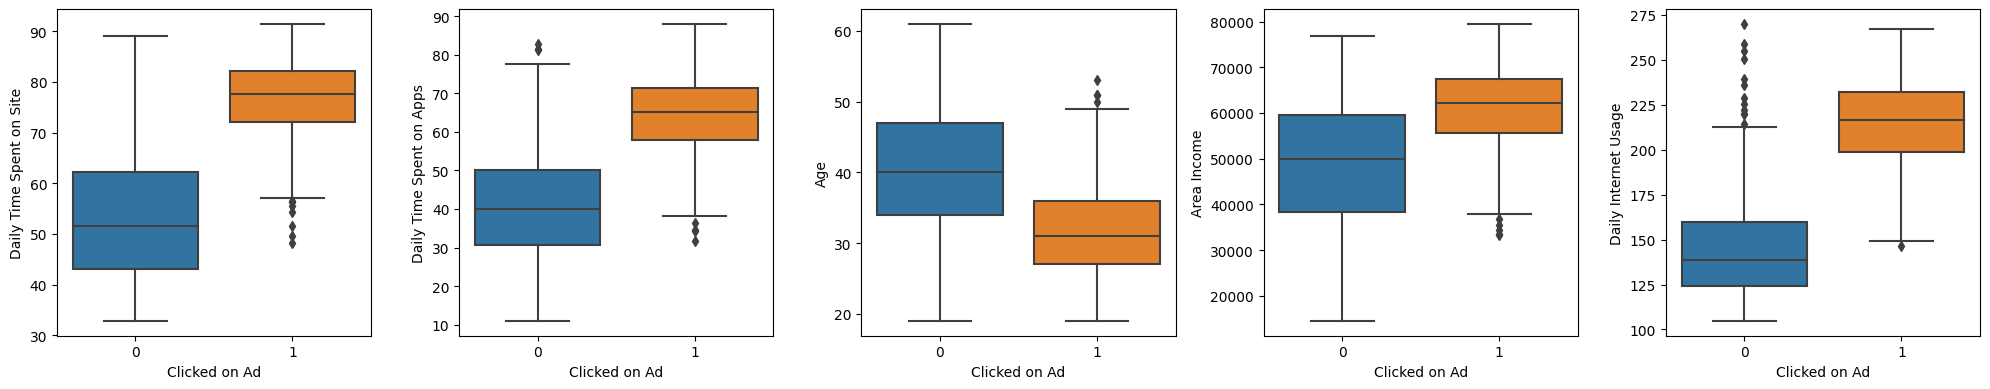

In [141]:
fig, axs = plt.subplots(ncols=5, figsize=(20, 4))
sns.boxplot(x='Clicked on Ad', y='Daily Time Spent on Site', data=df, ax=axs[0])
sns.boxplot(x='Clicked on Ad', y='Daily Time Spent on Apps', data=df, ax=axs[1])
sns.boxplot(x='Clicked on Ad', y='Age', data=df, ax=axs[2])
sns.boxplot(x='Clicked on Ad', y='Area Income', data=df, ax=axs[3])
sns.boxplot(x='Clicked on Ad', y='Daily Internet Usage', data=df, ax=axs[4])
plt.tight_layout()

Pada BoxPlot diatas, pada semua variabel yang ditampilkan memiliki outlier, namun tidak perlu dilakukan penghapusan karena penulis ingin menganalisis dengan metode yang dapat lebih robust terhadap outlier yaitu regresi logistik biner dengan regulasi ridge

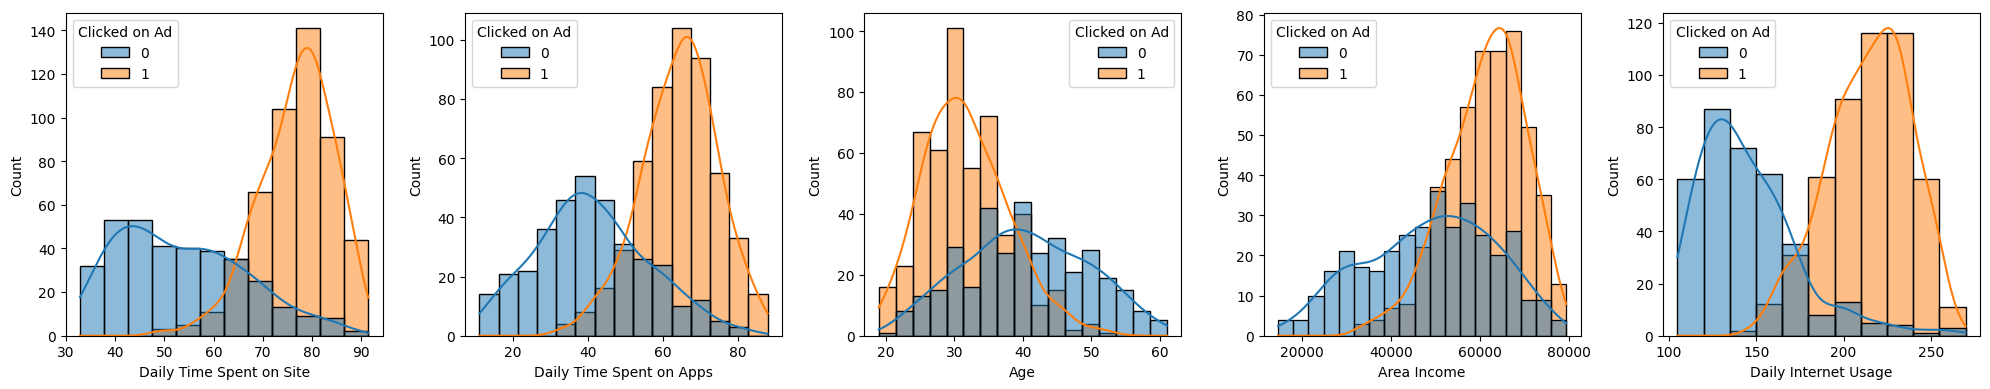

In [142]:
fig, axs = plt.subplots(ncols=5, figsize=(20, 4))
sns.histplot(data=df, x='Daily Time Spent on Site', hue='Clicked on Ad', kde=True, ax=axs[0])
sns.histplot(data=df, x='Daily Time Spent on Apps', hue='Clicked on Ad', kde=True, ax=axs[1])
sns.histplot(data=df, x='Age', hue='Clicked on Ad', kde=True, ax=axs[2])
sns.histplot(data=df, x='Area Income', hue='Clicked on Ad', kde=True, ax=axs[3])
sns.histplot(data=df, x='Daily Internet Usage', hue='Clicked on Ad', kde=True, ax=axs[4])

plt.tight_layout()
plt.show()

Pada Histogram diatas jika dipisahkan berdsarkan target yaitu menekan iklan atau tidak, terlihat bahwa keduanya memiliki distribusi yang terlihat normal antara orang yang menekan iklan dan tidak, namun memiliki karakteristik yang berbeda dimana pada orang yang menekan iklan memiliki puncak yang lebih tinggi dibandingkan yang tidak, kemudian pada variabel daily time spent on site, daily spent on apps, area income, dan daily usage internet memiliki rata rata yang lebih tinggi dan penyebaran yang lebih kecil dibandingkan orang yang lebih tinggi, sedangkan pada variabel Age, terlihat bahwa rata rata berada dibawah orang yang tidak menekan iklan, sehingga dari visualisasi di atas dapat disimpulkan sementara bahwa orang yang menghabiskan waktu lebih banyak di site, di apps, serta di internet, memeliki kecenderungan untuk menekan iklan daripada orang yang menghabiskan waktu lebih sedikit, dan orang dengan area income lebih besar cenderung lebih sering menekan iklan dibandingkan dengan yang kecil, dan dari orang yang menekan iklan di dominasi oleh orang yang relatif lebih muda.

Namun terlihat bahwa masih terdapat kurva yang tertumpuk yang diharapkan model yang dibangun dapat dengan baik mengklasifikasikan dengan combinasi variabel yang ada

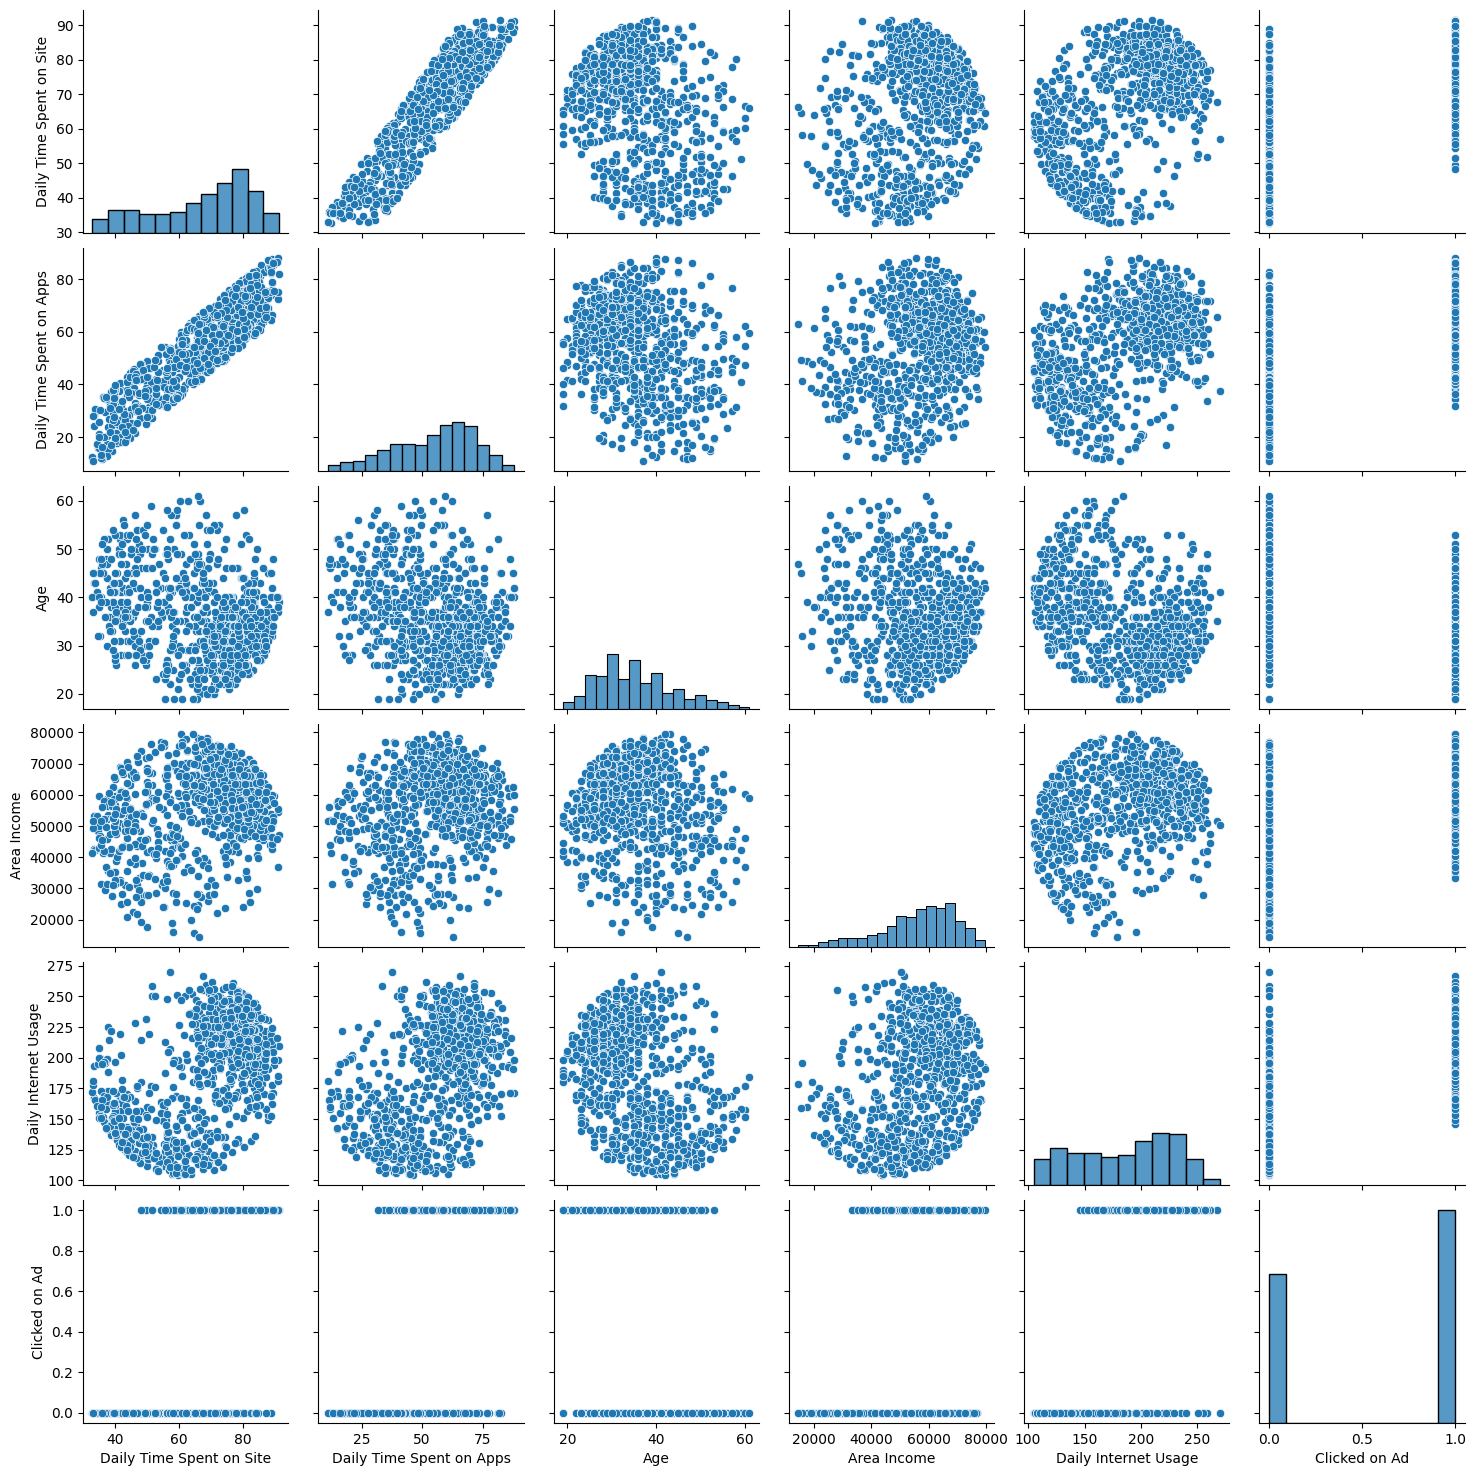

In [143]:
sns.pairplot(df)

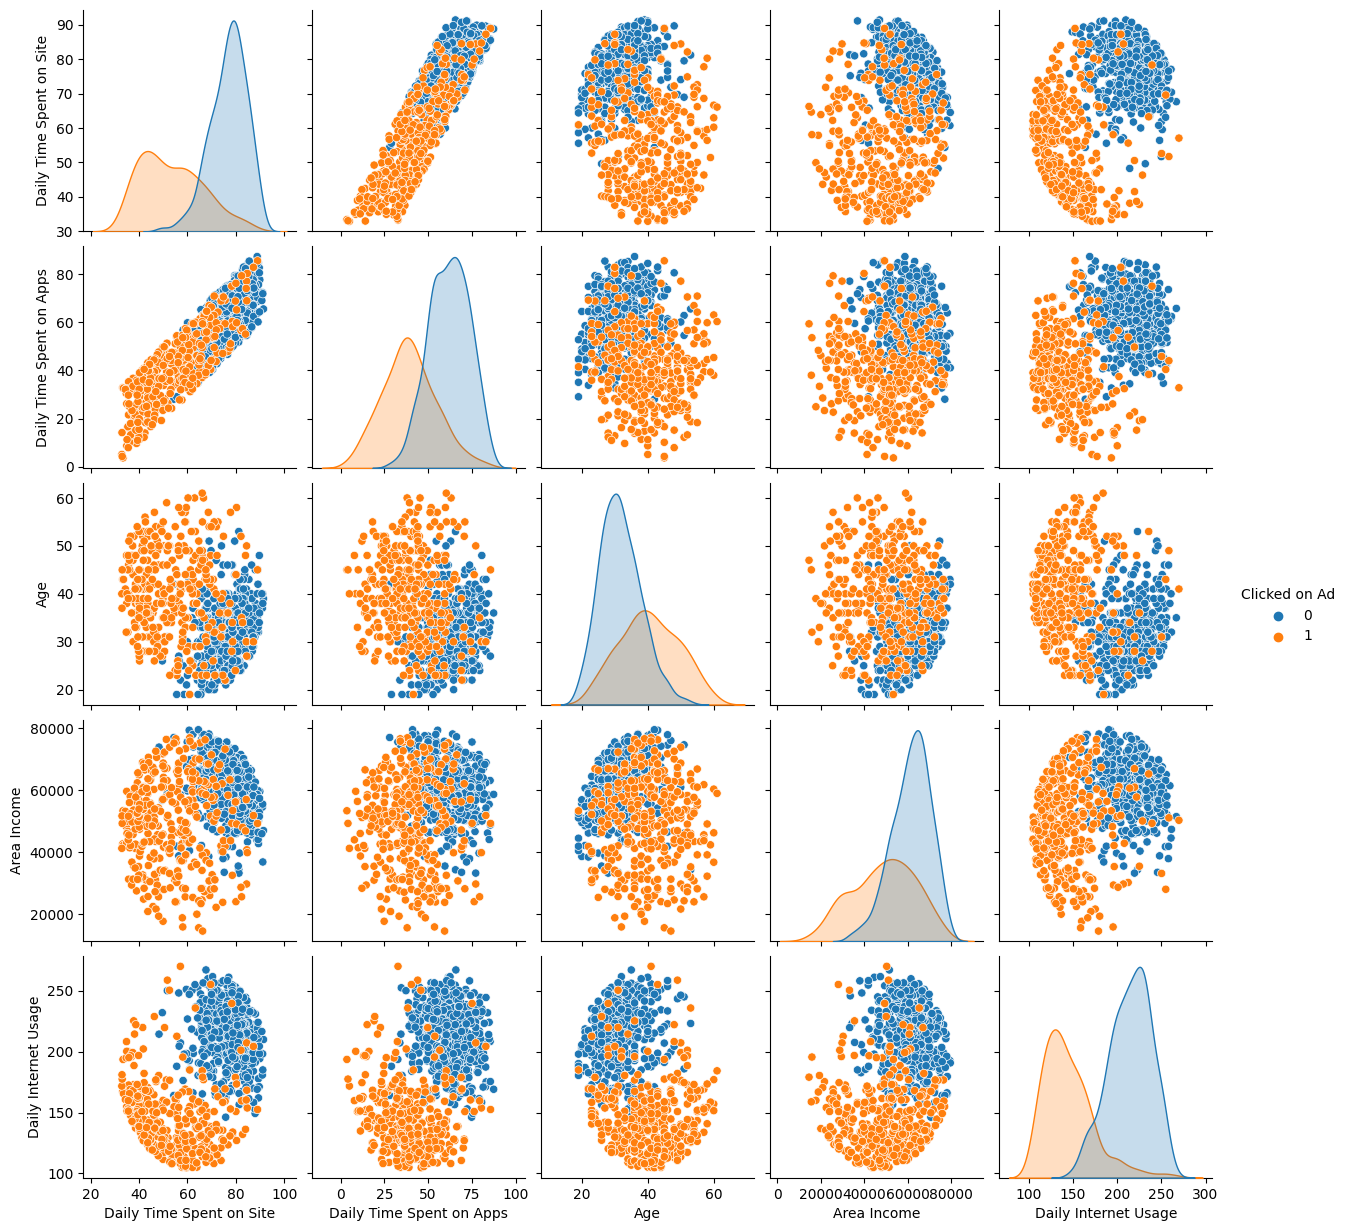

In [40]:
# Melihat Pairplo
sns.pairplot(df, hue="Clicked on Ad")

perbedaan terlihat pada pairplot antar variabel tanpa subkelompok dan dengan subkelompok clicked in ad, pada pairplot dengan subkelompok lebih terlihat terdapat perbedaan karakteristik yg cukup jelas ditandai dengan titik dengan warna yang sama cenderung mengumpul pada titik tertentu

C:\Users\HP\AppData\Local\Temp\ipykernel_16892\2563756421.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

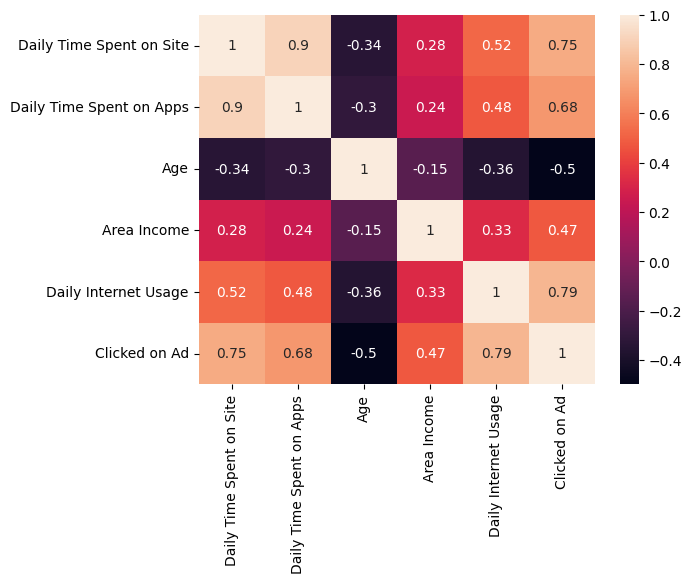

In [144]:
# Melihat matrix korelasi
sns.heatmap(df.corr(), annot=True)

pada heatmap di atas terlihat bahwa  antara varibael independen daily usage on site dan daily usage on apps memiliki korelasi yang tinggi, hal ini mengindikasikan terdapat multikolinearitas antar varibel independen, namun perlu dicari lebih dalam dengan nilai VIF

In [145]:
print(df['Ad Topic Line'].value_counts())

Cloned 5thgeneration orchestration          1
Focused intangible moderator                1
Customer-focused transitional strategy      1
Advanced web-enabled standardization        1
Polarized dynamic throughput                1
                                           ..
Integrated client-server definition         1
Managed 5thgeneration time-frame            1
Vision-oriented uniform knowledgebase       1
Down-sized explicit budgetary management    1
Team-oriented systematic installation       1
Name: Ad Topic Line, Length: 850, dtype: int64


In [146]:
print(df['City'].value_counts())

Wrightburgh        2
Port Julie         2
Lake Jose          2
Joneston           2
Lisamouth          2
                  ..
West Robertside    1
Port Maria         1
Port Anthony       1
Edwardmouth        1
Crawfordfurt       1
Name: City, Length: 829, dtype: int64


In [147]:
print(df['Country'].value_counts())

Greece                                          8
Australia                                       8
Micronesia                                      8
Czech Republic                                  8
South Africa                                    8
                                               ..
South Georgia and the South Sandwich Islands    1
Central African Republic                        1
Cape Verde                                      1
Denmark                                         1
Andorra                                         1
Name: Country, Length: 235, dtype: int64


dari ketiga variabel diatas, keberagaman topik, negara, dan kota, cenderung banyak sehingga memiliki nilai beragram di setiap unit obsevasi, sehingga untuk mempercepat proses learning dan pembuatan model, variabel ini dapat tidak diikutsertakan

In [148]:
# Menghapus data yang dianggap tidak berpengaruh untuk mempercepat proses learning
X = df.drop(['Timestamp', 'Clicked on Ad', 'Ad Topic Line', 'Country', 'City'], axis=1)
X.head()

,Daily Time Spent on Site,Daily Time Spent on Apps,Age,Area Income,Daily Internet Usage,Gender
0,68.95,59.46,35,61833.90,256.09,Female
1,80.23,63.71,31,68441.85,193.77,Male
2,69.47,53.84,26,59785.94,236.50,Female
3,74.15,56.04,29,54806.18,245.89,Male
4,68.37,55.64,35,73889.99,225.58,Female


Mendeklarasikan variabel independen dan menghapus beberapa variabel yang dianggap tidak terlalu berpengaruh pada analisis

pada variabel gender merupakan variabel kategorik sehingga perlu dilakukan dummy sebelum permodelan

In [149]:
# membuat variabel dummy
dummy = pd.get_dummies(X['Gender'])

In [150]:
# menghapus variabel kategorik
X = X.drop('Gender', axis=1)

In [151]:
X = pd.concat([X, dummy["Male"]], axis=1)
print(X.head())

   Daily Time Spent on Site  Daily Time Spent on Apps  Age  Area Income  \
0                     68.95                     59.46   35     61833.90   
1                     80.23                     63.71   31     68441.85   
2                     69.47                     53.84   26     59785.94   
3                     74.15                     56.04   29     54806.18   
4                     68.37                     55.64   35     73889.99   

   Daily Internet Usage  Male  
0                256.09     0  
1                193.77     1  
2                236.50     0  
3                245.89     1  
4                225.58     0  


In [152]:
# Menginisiasi variabel target y
y= df['Clicked on Ad']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Clicked on Ad, dtype: int64

mendeklarasikan variabel dependen

In [153]:
# Melihat Jumlah/proporsi apakah data balance atau tidak
print(y.value_counts())

1    500
0    350
Name: Clicked on Ad, dtype: int64


Terlihat bahwa data memiliki jumlah yang tidak seimbang, sehingga dapat dilakukan balancing untuk meningkatkan peforma model

In [154]:
# Jika data imbalance makan dapat di balancing dengan metode oversampling atau undersampling

from imblearn.over_sampling import SMOTE


# Contoh menggunakan SMOTE
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

Balancing dengan menggunakan teknik oversampling SMOTE

In [155]:
# Menghitung nilai VIF untuk melihat apakah terdapat gejala multikolinearitas atau tidak
XX = X_resampled

# Menambahkan intercept ke dalam model
XX = sm.add_constant(XX)

# Menghitung nilai VIF
vif = pd.DataFrame()
vif["variables"] = XX.columns
vif["VIF"] = [variance_inflation_factor(XX.values, i) for i in range(XX.shape[1])]

# Menampilkan nilai VIF
print(vif)

                  variables        VIF
0                     const  79.694930
1  Daily Time Spent on Site   6.202409
2  Daily Time Spent on Apps   5.807072
3                       Age   1.202670
4               Area Income   1.151020
5      Daily Internet Usage   1.542386
6                      Male   1.014407


Terlihat bahwa nilai VIF pada variabel 1 dan 2 memiliki nilai >5 sehingga terdapat indikasi multikolinearitas, namun tidak dilakukan seleksi variabel karena multikolinearitas dapat diatas dengan regulasi ridge

In [156]:
# Split data train test
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=1)

In [157]:
# Standarisasi dikarenakan terdapat perbedaan sekala yang cukup besar pada data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [158]:
# Membangun Model regresi logistik dengan regularisasi ridge
lr = LogisticRegression(_lambda=0.5)
lr.fit(X_train, y_train)

Loss at iteration 0: 0.6877202331733933
Loss at iteration 100: 0.383730430950452
Loss at iteration 200: 0.2781202760666983
Loss at iteration 300: 0.22757347397979638
Loss at iteration 400: 0.19817310608966854
Loss at iteration 500: 0.1788971559979057
Loss at iteration 600: 0.1652166924905884
Loss at iteration 700: 0.15495072386658257
Loss at iteration 800: 0.14692411332734354
Loss at iteration 900: 0.1404486979844999


Terlihat bahwa loss disetiap iterasinya semakin mengecil dan semakin konvergen dengan nilai yg kecil

In [159]:
# Rangkuman Model
lr.summary()

Coefficient Estimates:
[-0.09960713  0.85399153  0.67932822 -0.60728338  0.63532271  1.19137826
  0.20373582]

Odds Ratio:
[0.90519297 2.34900428 1.97255216 0.54482895 1.88763119 3.29161477
 1.22597423]

Standard Errors:
[0.0353443  0.08986778 0.08674383 0.0385774  0.03807744 0.04418296
 0.03561552]

T-values:
[ -2.81819529   9.50275582   7.83142995 -15.7419452   16.68501813
  26.9646516    5.72042175]

P-values:
[4.94966330e-03 0.00000000e+00 1.55431223e-14 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.50569825e-08]


terlihat pada P-Vlaue semuanya <0,05 yang artinya semua variabel berpengaruh signifikan terhadap model

note : jika terdapat variabel yang tidak signifikan dapat dilakukan permodelan ulang dengan eleminasi backward atau stepwise forward

dengan interpretasi sebagai berikut
1. variabel Daily Time Spent on Site
terlihat pada estimasi koefisien yang didapatkan bertanda positif hal ini menandakan bahwa antara variabel Daily Time Spent on Site dengan variabel clicked on ad memiliki hubungan yang posisif, artinya orang dengan Daily Time Spent on Site lebih tinggi akan berpeluang menekan ad lebih besar, dengan nilai odds ratio sebesar 2.34, yang artinya orang yang menghabiskan waktu satu satuan lebih tinggi pada site maka diperkirakan akan berpeluang menekan ad 2,34 lebih mungkin dibandingkan orang dengan waktu yg dihabiskan dalam site satu satuan lebih rendah.

2. Variabel Daily Time Spent on Apps
terlihat pada estimasi koefisien yang didapatkan bertanda positif hal ini menandakan bahwa antara variabel Daily Time Spent on Apps dengan variabel clicked on ad memiliki hubungan yang posisif, artinya orang dengan Daily Time Spent on Apps lebih tinggi akan berpeluang menekan ad lebih besar, dengan nilai odds ratio sebesar 1.97, yang artinya orang yang menghabiskan waktu satu satuan lebih tinggi pada apps maka diperkirakan akan berpeluang menekan ad 1.97 lebih mungkin dibandingkan orang dengan waktu yg dihabiskan dalam apps satu satuan lebih rendah.

3. variabel Age
terlihat pada estimasi koefisien yang didapatkan bertanda negatif hal ini menandakan bahwa antara variabel Age dengan variabel clicked on ad memiliki hubungan yang negatif, artinya orang dengan usia lebih tinggi akan berpeluang menekan ad lebih rendah, dengan nilai odds ratio sebesar 0.55, yang artinya orang dengan usia satu satuan lebih tinggi maka diperkirakan akan berpeluang menekan ad 0.55 lebih mungkin dibandingkan orang dengan usia satu satuan lebih rendah.

4. variabel Area Income
terlihat pada estimasi koefisien yang didapatkan bertanda positif hal ini menandakan bahwa antara variabel Area income dengan variabel clicked on ad memiliki hubungan yang posisif, artinya orang dengan area income lebih tinggi akan berpeluang menekan ad lebih besar, dengan nilai odds ratio sebesar 1.88, yang artinya orang dengan area income satu satuan lebih tinggi maka diperkirakan akan berpeluang menekan ad 1.88 lebih mungkin dibandingkan orang dengan area income satu satuan lebih rendah.

5. variabel Daily Internet Usage
terlihat pada estimasi koefisien yang didapatkan bertanda positif hal ini menandakan bahwa antara variabel Daily Internet Usage dengan variabel clicked on ad memiliki hubungan yang posisif, artinya orang dengan daily internet usage lebih tinggi akan berpeluang menekan ad lebih besar,dengan nilai odds ratio sebesar 3.29, yang artinya orang dengan penggunaan internet harian satu satuan lebih tinggi maka diperkirakan akan berpeluang menekan ad 3.29 lebih mungkin dibandingkan orang dengan penggunaan internet harian satu satuan lebih rendah.

7. variabel Dummy gender is Male
terlihat pada estimasi koefisien yang didapatkan bertanda positif hal ini menandakan bahwa antara variabel jenis kelamin laki laki dengan variabel clicked on ad memiliki hubungan yang posisif, artinya orang dengan jenis kemalin laki laki berpeluang menekan ad lebih besar dibanding perempuan, dengan nilai odds ratio sebesar 1.22, yang artinya orang dengan jenis kelamin laki-laki diperkirakan akan berpeluang menekan ad 1.22 lebih mungkin dibandingkan orang dengan jenis kelamin perempuan.

In [160]:
# Membuat Prediksi
y_pred = lr.predict(X_test)

In [161]:
# Evaluasi peforma model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Auc: {recall_score(y_test, y_pred)}')
print(f'F1 Score: {f1_score(y_test, y_pred)}')
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("Confusion Matrix:")
print("TN: ", tn, " FP: ", fp)
print("FN: ", fn, " TP: ", tp)

Accuracy: 0.97
Auc: 0.9895833333333334
F1 Score: 0.9693877551020408
Confusion Matrix:
TN:  99  FP:  5
FN:  1  TP:  95


Pada data testing didapatkan hasil yang sangat baik dengan hasil akurasi, auc, F1 score seperti di atas, hanya terdapat 5 variabel negatif yang diklasifikasikan ke variabel positif dan terdapat 1 variabel negatif yang diklasifikikan ke variabel positif.